In [1]:
import sys
import os

# Add the root of the project to the path
sys.path.append(os.path.abspath("D:\\burtm\\Visual_studio_code\\PD_related_projects"))

In [34]:
import pandas as pd

source_path="D:\\burtm\\Visual_studio_code\\PD_related_projects"
source_file="icdar_train_df_20250514_175905.csv"
train_df = pd.read_csv(f"{source_path}\\outputs\\preprocessed_data\\{source_file}")
gw=10
prop=1
n_cc=1
sort_by="black_ratio"



In [9]:
train_df.head()

,writer,isEng,same_text,file_name,male,train,index
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0
1,1,0,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1
2,1,1,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,2
3,1,1,1,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,3
4,2,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,4


In [35]:
train_df_expanded = pd.DataFrame(sum(train_df.apply(image_processing.process_row, axis=1,args=(gw, n_cc,prop)), []))

train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1968,246,2214,492,2,0.000017
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,0,492,246,738,30,0.032900
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,246,492,492,738,30,0.038370
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,492,492,738,738,26,0.042898
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,738,492,984,738,29,0.046599
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,984,492,1230,738,24,0.046698
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1230,492,1476,738,35,0.040650
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1476,492,1722,738,28,0.040155
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1722,492,1968,738,20,0.047772
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1968,492,2214,738,28,0.041642


In [36]:
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1968,246,2214,492,2,0.000017
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,0,492,246,738,30,0.032900
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,246,492,492,738,30,0.038370
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,492,492,738,738,26,0.042898
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,738,492,984,738,29,0.046599
5,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,984,492,1230,738,24,0.046698
6,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1230,492,1476,738,35,0.040650
7,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1476,492,1722,738,28,0.040155
8,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1722,492,1968,738,20,0.047772
9,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1968,492,2214,738,28,0.041642


In [ ]:
#save the full dataset if you don't want to filter patches
'''
file_path=source_path+"\\outputs\\preprocessed_data\\icdar_train_df_patches_complete_cc.csv"
train_df_expanded.to_csv(file_path, index=False)
print(f"File saved: {file_path}")'''


File saved: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_complete_cc.csv


In [37]:
#i select the m patches per file that have the highest number of cc
m=15
train_df_expanded_sorted = train_df_expanded.sort_values(by=sort_by, ascending=False)
train_df_expanded = train_df_expanded_sorted.groupby('file_name').head(m)   # Select top m patches per writer
#If a group (i.e., a specific 'writer') in the DataFrame has fewer than m rows, 
# the head(m) method will simply return all the rows available for that group. It does not raise an error or fill in additional rows

In [38]:
train_df_expanded = train_df_expanded.sort_values(by='index')
train_df_expanded = train_df_expanded.reset_index(drop=True)
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1722,984,1968,1230,32,0.134890
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,0,738,246,984,26,0.054349
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,984,738,1230,984,27,0.071138
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,738,738,984,984,23,0.064710
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,984,984,1230,1230,37,0.052350
5,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,738,984,984,1230,37,0.050185
6,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1476,738,1722,984,25,0.049805
7,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1476,984,1722,1230,38,0.087299
8,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1722,738,1968,984,33,0.049342
9,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,246,738,492,984,37,0.048979


In [39]:
index_counts = train_df_expanded['index'].value_counts()
all_counts_correct = (index_counts == m).all()
print(f"Each unique index appears {m} times: {all_counts_correct}")
if not all_counts_correct:
    print("Indices with incorrect counts:")
    print(index_counts[index_counts != m])

Each unique index appears 15 times: True


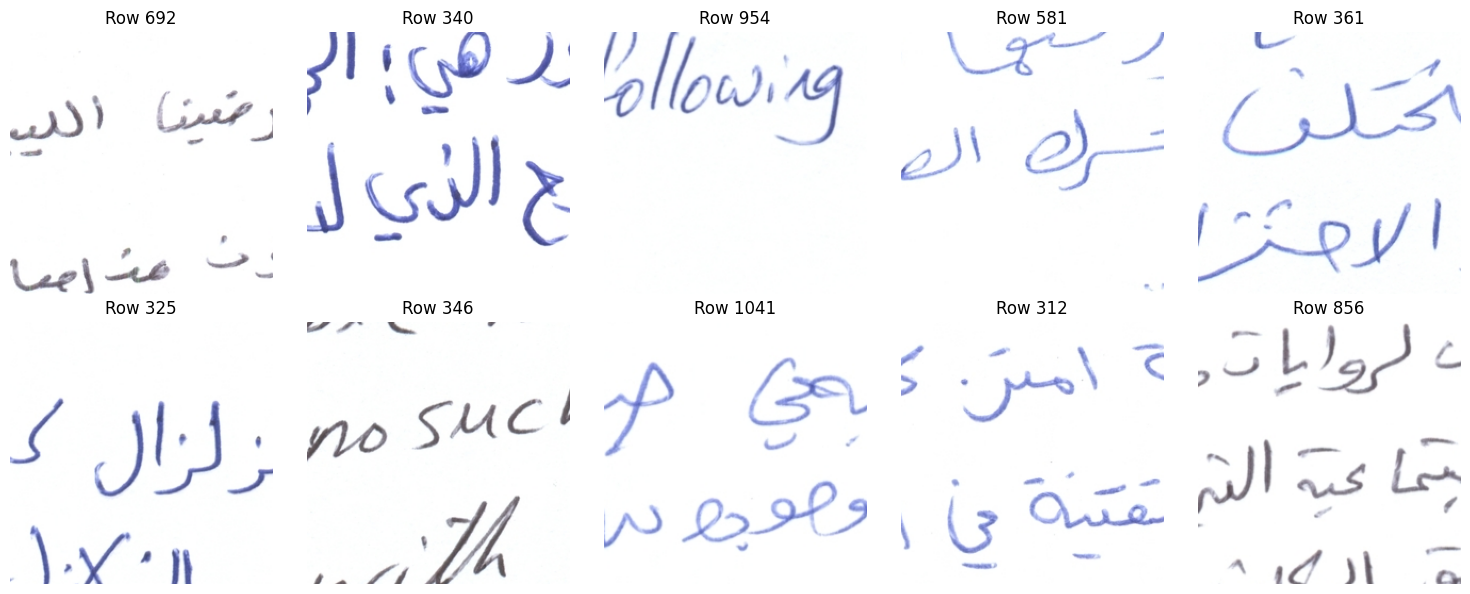

In [40]:
visualization.plot_cropped_sections(train_df_expanded)

In [29]:
# The number of patches per writer, should be 5*4
len(train_df_expanded)/282

20.0

In [42]:
tests.check_randomization(train_df_expanded)
tests.check_grouping(train_df_expanded)
tests.check_occurrences(train_df_expanded,count=4*m)

Number of rows where train == 1: 15180
Fraction of rows where train == 1: 0.90
The train column is constant for all writers.
Each unique writer value occurs on exactly 60 rows.


In [35]:
import random
random_numbers = random.sample(range(1, len(train_df_expanded)), 10)
for n in random_numbers:
    print(n)
    print('first df \n', train_df_expanded.iloc[n])
    i=train_df_expanded['writer'][n]
    #print('writer', i)
    print(train_df[train_df['writer'] == i])
    print('-------------')

3763
first df 
 writer                                                       189
isEng                                                          0
same_text                                                      0
file_name      D:\download\PD project\datasets\ICDAR 2013 - G...
male                                                           0
train                                                          1
index                                                        752
x                                                            984
y                                                            492
x2                                                          1230
y2                                                           738
n_cc                                                          21
black_ratio                                             0.054977
Name: 3763, dtype: object
     writer  isEng  same_text  \
752     189      0          0   
753     189      0          1   
754     189   

In [43]:
train_df_expanded['index']=train_df_expanded.index
train_df_expanded.head(10)

,writer,isEng,same_text,file_name,male,train,index,x,y,x2,y2,n_cc,black_ratio
0,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,0,1722,984,1968,1230,32,0.134890
1,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,1,0,738,246,984,26,0.054349
2,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,2,984,738,1230,984,27,0.071138
3,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,3,738,738,984,984,23,0.064710
4,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,4,984,984,1230,1230,37,0.052350
5,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,5,738,984,984,1230,37,0.050185
6,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,6,1476,738,1722,984,25,0.049805
7,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,7,1476,984,1722,1230,38,0.087299
8,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,8,1722,738,1968,984,33,0.049342
9,1,0,0,D:\download\PD project\datasets\ICDAR 2013 - G...,0,1,9,246,738,492,984,37,0.048979


In [44]:
from datetime import datetime

timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")
output_dir = os.path.join(source_path, "outputs", "preprocessed_data")
os.makedirs(output_dir, exist_ok=True)  # Create the directory if it doesn't exist

output_file = os.path.join(output_dir, f"icdar_train_df_patches_{timestamp}.csv")
train_df_expanded.to_csv(output_file, index=False)

print(f"Dataframe saved to {output_file}")

Dataframe saved to D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_20250522_235724.csv


In [45]:
# Example usage:
LOG_FILE = output_dir+"\\file_metadata_log.json"
print(f"Log file path: {LOG_FILE}")
print(f"Output file path: {output_file}")
file_IO.add_or_update_file(
    output_file, LOG_FILE,
    custom_metadata={
        #"seed": seed,
        "m patches": m,
        "source_file": source_file,
        "gw": gw,
        "n_cc":n_cc,
        "prop": prop,
        "sort_by": sort_by,
        "description": '''
        I am creating a dataset identical to another one but with 3x patches per writer.''' 
    }
)

Log file path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\file_metadata_log.json
Output file path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_20250522_235724.csv
Updated log for icdar_train_df_patches_20250522_235724.csv


In [39]:
file_IO.read_metadata(
    output_file,
    log_path=LOG_FILE
)

Metadata for icdar_train_df_patches_20250521_120324.csv:
full_path: D:\burtm\Visual_studio_code\PD_related_projects\outputs\preprocessed_data\icdar_train_df_patches_20250521_120324.csv
size_bytes: 975964
created: 2025-05-21T12:03:25.094240
modified: 2025-05-21T12:03:25.356208
accessed: 2025-05-21T12:03:25.356208
m patches: 5
source_file: icdar_train_df_20250514_175905.csv
gw: 10
n_cc: 1
sort_by: black_ratio
description: 
        I am reducing the dimension of the patches at the level of words/characters
        For each unique index = (isEng,same_text) pair i select the m patches with more black pixels
        the final df has m*4 patches per writer, it adds the x,y,x1,y1 columns to extract the patch
        It also add an index column that is unique for each patch


In [ ]:
'''import pyarrow as pa
import pyarrow.parquet as pq
from datetime import datetime
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# Your metadata
metadata = {
    'author': 'Andrea Morelli',
    'date': timestamp,
    'description': 'dividing images in 25th and counting the number of ccs, using a threshold of 10. I extract the 5 patches with more ccs for each unique file'
}

# Convert DataFrame to pyarrow Table
table = pa.Table.from_pandas(train_df_expanded)

# Convert metadata to bytes and attach to schema
# Parquet metadata must be a dict of bytes
meta_bytes = {k: str(v).encode('utf-8') for k, v in metadata.items()}
table = table.replace_schema_metadata(meta_bytes)

# Write to Parquet file
pq.write_table(table, 'icdar_train_df_cc_5patches_perName.parquet')'''

# easy access

In [15]:
def reload_modules():
    import importlib
    import utils.image_processing as image_processing
    import utils.file_IO as file_IO
    import utils.visualization as visualization
    import utils.tests as tests

    importlib.reload(file_IO)
    importlib.reload(image_processing)
    importlib.reload(visualization)
    importlib.reload(tests)

    return image_processing, file_IO, visualization, tests
image_processing, file_IO, visualization, tests = reload_modules()